Charger le dataset 'movie_metadata.csv'

Regarder s'il ya des valeurs nulles dans le dataset

Si oui, remplacer les valeurs nulles par des 0

Tracer la "heatmap" des correlations entre les colonnes

Identifier les colonnes qui sont soit des int64 et float64

Diviser le dataset en deux datasets plus petits (un de 70%, qu'on appelera "train" et un de 30% qu'on apelera "test" du dataset initial) avec la methode train_test_split

Choisir la colonne "imdb_score" comme target et toutes les autres comme features, et donc définir y_train, X_train, y_test et X_test

Utiliser le model linear_model.LinearRegression() de sklearn pour faire la régression linéaire

Définir le model
Donner X_train et y_train au model pour qu'il s'entraine
Regarder le score du modèle pour X_train et y_train
Regarder le score du modèle pour X_test et y_test

In [3]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("movie_metadata.csv")
df.isna().sum() / df.count() * 100

color                         0.378185
director_name                 2.105689
num_critic_for_reviews        1.001402
duration                      0.298329
director_facebook_likes       2.105689
actor_3_facebook_likes        0.458167
actor_2_name                  0.258449
actor_1_facebook_likes        0.138999
gross                        21.255109
genres                        0.000000
actor_1_name                  0.138999
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.458167
facenumber_in_poster          0.258449
plot_keywords                 3.128834
movie_imdb_link               0.000000
num_user_for_reviews          0.418160
language                      0.238521
country                       0.099246
content_rating                6.392405
budget                       10.810811
title_year                    2.188450
actor_2_facebook_likes        0.258449
imdb_score               

In [5]:
df.fillna(0, inplace=True)

<AxesSubplot:>

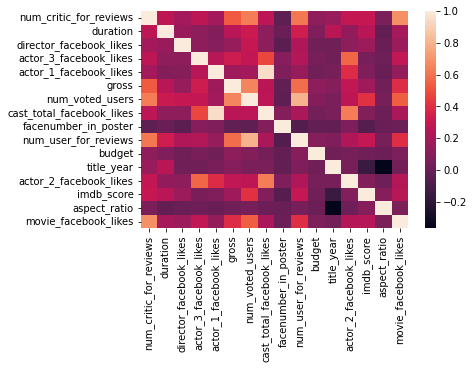

In [6]:
sb.heatmap(df.corr())

In [7]:
df_nb = df.select_dtypes(exclude="object")

In [12]:
df_nb.dtypes
X = df_nb.drop(columns="imdb_score")
y = df["imdb_score"].copy()
X1_train,X1_test, y1_train, y1_test = train_test_split(X,y, test_size= 0.30, random_state=42)

In [13]:
LinearRegression().fit(X1_train,y1_train).score(X1_train,y1_train),LinearRegression().fit(X1_test,y1_test).score(X1_test,y1_test)

(0.29150894842283115, 0.2737581369493981)

In [10]:
X1_test

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
4943,3.0,89.0,0.0,163.0,196.0,0.0,100,942,0.0,3.0,125000.0,2014.0,180.0,0.00,72
1919,151.0,124.0,44.0,367.0,4000.0,36447959.0,35833,6393,0.0,96.0,25000000.0,2014.0,774.0,2.39,10000
1049,125.0,123.0,446.0,821.0,20000.0,47095453.0,64595,22209,1.0,316.0,48000000.0,2001.0,1000.0,1.85,0
4697,2.0,107.0,0.0,236.0,752.0,10508.0,103,1763,4.0,6.0,700000.0,1998.0,282.0,0.00,102
3312,76.0,120.0,930.0,433.0,982.0,349618.0,4302,2942,1.0,45.0,9000000.0,1990.0,602.0,1.85,375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,288.0,148.0,0.0,7.0,30.0,5100937.0,68885,50,0.0,127.0,0.0,2010.0,9.0,2.35,29000
1033,103.0,96.0,43.0,77.0,841.0,8742261.0,19824,1385,2.0,179.0,18000000.0,2009.0,342.0,2.35,0
1097,38.0,110.0,49.0,20.0,13000.0,57362581.0,50148,13331,2.0,116.0,45000000.0,1994.0,279.0,1.85,0
1469,180.0,106.0,309.0,63.0,327.0,28064226.0,65044,561,1.0,173.0,35000000.0,2011.0,73.0,2.35,13000


In [11]:
ix = df[['imdb_score', 'aspect_ratio']]
ax = df_nb.drop(ix, axis=1).applymap(int)
ox = ax.join(ix)
ox.all(axis=1).count()

5043